# COGS 108 - Final Project 

# 2 - Overview

For the final research project, our group are interested in the correlation between Spotify songs’ popularity and the sentiments of those songs. We conducted webscraping from Spotify charts and GENIUS, TF-IDF analysis, sentiment analysis and linear regressions. For the regression, we used streams of songs as a measurement of popularity and sentiment scores as the independent variable, and we also had additional control variables such as title lengths of the songs to avoid omitted variable bias. Our findings suggest that if a song is positive in sentiment and its artist is popular, it is likely to be popular.

# 3 - Names

- Jingyi Ye
- Ruwei Zhou
- Duolan Ouyang
- Jianlin Wang
- Daniel Shaughnessy

# 4 - Research Question

Is there a correlation between the popularity of a song on Spotify and the sentiment of its lyrics between 2017 and 2019?

## 5 - Background and Prior Work

Music has always been an important part of many people’s lives, but these days, less and less people buy physical album, and instead, they choose platform like Spotify to enjoy the music pieces. Everyone in our team is a music lover, so we really hope to do some analysis related to music. Since Spotify is currently the largest music platform in the United States, we want to formalize our research question around it. Many of us have background knowledge on different attributes of a song. We recognize that music genres, artists, tempos, messages, etc. can determine a song’s popularity, but we do not clearly understand to what extent can these affect song streams. 

In the article “Why Do Some Songs Become Popular?” by Arash Emamzadeh on Psychology Today, the author describes a study which analyzes the lyrics of the songs and its relationship with song popularity. They found that songs which “evoke the warm glow of familiarity” are more likely to be popular (Emamzadeh). Inspired by this article, our group would like to further analyze the song lyrics but also add more aspects (i.e. song attributes) to the analysis. The research article “Muscial trends and predictability of success in contemporary songs in and out of the top charts” from The Royal Society serves as a support and inspiration for our project. The research also focuses on the emotion and speed of songs, for example danceability and happiness, with a little portion of artist analysis. The result shows that the more extreme in emotion a song gets, the most popular the song will likely be (Interiano). We found that many researches on Spotify song popularities have predominantly focused on lyric emotions, a few involve studies in artist popularity, word frequencies, but very limited research has been able to combine all these aspects together. This leads to the formation of our project. 

We believe including artists popularity, lyric words’ frequency, etc. are essential to our analysis on the relationship of these attributes with song popularity measured by streams. The reason is intuitive: artist, emotion and lyric word choices can all potentially be key drivers of a song’s success. When listeners pick their songs, they will definitely consider who the songs is created by, what emotions the song brings, how beautiful and relatable the song lyrics are, etc. By combining all these aspects together, our group think we can create a more successful and precise model to estimate a song’s popularity.


References (include links):
- 1) Emamzadeh , Arash. “Why Do Some Songs Become Popular?” Psychology Today , 7 June 2018,
     www.psychologytoday.com/us/blog/finding-new-home/201806/why-do-some-songs-become-popular
- 2) Interiano, Myra, et al. Musical Trends and Predictability of Success in Contemporary Songs in and out of the Top Charts. The Royal Society , 16 May 2018, royalsocietypublishing.org/doi/10.1098/rsos.171274#d3e381 
    https://royalsocietypublishing.org/doi/10.1098/rsos.171274#d3e381

# 6 - Hypothesis


**Null Hypothesis:** The sentiment of lyrics had NO effect on the popularity of a English-language song on Spotify from 2017 to 2019.

**Alternative Hypothesis**: The sentiment of lyrics DID have an effect on the popularity of an English-language song on Spotify between 2017 and 2019.



# 7 - Dataset(s)

#### Set 1: Lyrics Data Set ####  
__Link__: A generated file, can be found in the raw_data folder of our project.  
__Number of Observations__: 3,623  
__Description__: The unmodified lyrics for each analyzed song. We collected these lyrics via calls to the Genius lyrics database/website.


#### Set 2: Spotify Top 200 Data Set ####
__Link__: A set of generated files can be found in the raw_data folder of our project, using the format "year_results.csv"  
__Number of Observations__: 211,146  
__Description__: A list of the top 200 songs for almost every day during the years 2017-2019. This was used to find the top songs during this period. We scraped the data for the daily positions from spotifycharts.com, using the daily top 200 hits. 

# 8 - Setup

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import requests
import io
import json
import re
import string
import nltk
import warnings
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from statsmodels.formula.api import ols
from nltk.tokenize.treebank import TreebankWordDetokenizer


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install --user langdetect
from langdetect import detect

plt.rcParams['figure.figsize'] = (18, 7)
plt.rcParams.update({'font.size': 16})
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package punkt to /home/duouyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/duouyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 8.1 - Scraper (Code Sample) ###
This represents a sample of the scraper code we used while collecting the **Spotify Top 200 Data Set**. However, it ended up timing out when run over the full time period, so the code was run in increments based on individual years in the year_range value (i.e the range would be 2017 to 2018 to generate a year's worth of values). We then merged the individual year files to obtain the full data set used in the project's analysis.

In [2]:

#df_list = []
#month_length = [0,31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    # the year range can be changed to a larger range
    # I broke it into individual years to better manage
    # size of dataframe
#year_range = range(2017, 2019)
#month_range = range(1,13)
#date_arr = []
#date_str = '0000-00-00'
#for year in year_range:
#        date_str = str(year) + date_str[4:]
#        for month in month_range:
#            date_str = date_str[0:5] + "{:02d}".format(month) + date_str[7:]
#            for day in range (1,month_length[month]):
#                date_str = date_str[:8] + "{:02d}".format(day)
#                date_arr.append(date_str)



#for date in date_arr:
#    url = "https://spotifycharts.com/regional/global/daily/" + str(date) + "/download"
#    response = requests.get(url)
#    if response.ok != True:
#        continue
#    s = response.content
#    print(date)
#    df = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None,  skiprows= lambda x: x in [0, 1])
#    df.columns = ['position', 'track_name', 'artist', 'streams', 'url']
#    df['date'] = date
#    df_list.append(df[:])

#result = pd.concat(df_list)
#result.to_csv('2017_to_2019_results.csv')

# 9 - Data Cleaning

#### 9-1. Import Top 200 Data ####  
The first step in the data cleaning process was importing and merging all of the data

In [3]:
#Import Songs

#import all songs from 2017
df_2017_songs = pd.read_csv('raw_data/2017_results.csv')
print('2017 data imported successfully!')

#import all songs from 2018
df_2018_songs = pd.read_csv('raw_data/2018_results.csv')
print('2018 data imported successfully!')

#import all songs from 2019
df_2019_songs = pd.read_csv('raw_data/2019_results.csv')
print('2019 data imported successfully!')

#combine the 3 years of data into the all_songs DataFrame
frames = [df_2017_songs,df_2018_songs,df_2019_songs]
all_songs = pd.concat(frames)
#all_songs.drop(columns=['index'],inplace=True)
all_songs.index.name='index'
print('all_songs length =',len(all_songs),'records')
all_songs.to_csv('raw_data/all_songs.csv')
print('raw_data/all_songs.csv created successfully!')

2017 data imported successfully!
2018 data imported successfully!
2019 data imported successfully!
all_songs length = 211200 records
raw_data/all_songs.csv created successfully!


#### 9-2. Import Song Lyrics ####
We then did the same for the scraped song lyrics.

In [4]:
#Import Lyrics
df_lyrics = pd.read_csv('raw_data/cleaned_lyrics_db.csv', index_col=0)
df_lyrics.index.name = 'index'
print('lyrics imported successfully!')
print(len(df_lyrics),'unique song lyrics imported!')

lyrics imported successfully!
3623 unique song lyrics imported!


#### 9-3. Input Data : Cleaning and Fixes for Missingness ####  
The initial data formatting wasn't perfect, so we made adjustments. Additionally, some of the days or tracks were no longer available via the Spotify platform, so they were removed due to being untraceable using the source information.

In [5]:
# relabel fields to correct values
df_lyrics.rename(columns={"track_name": "artist", "artist": "track_name"}, inplace=True)
print(f'{len(all_songs)} rows')

# remove missing songs (not available in data source)
all_songs.drop(all_songs[all_songs['track_name'].isna()].index, inplace=True)
print(f'{len(all_songs)} rows')

#get unique song names
unique_song_names = all_songs['track_name'].unique()
print('success, found', len(unique_song_names), 'unique songs across')

# VERY IMPORTANT: this generates a list of all artists, songs, and creates an association between
# them as a dictionary to enable searching. Takes a while to run.
artist_names = []
songs_by_artist = {}
artist_by_song = {}
for song in unique_song_names:
    artist_arr = all_songs[all_songs['track_name'] == song]['artist'].unique()
    artist = artist_arr[0]
    artist_names.append(artist)
    if artist in songs_by_artist:
        songs_by_artist[artist] = songs_by_artist[artist] + [song]
    else:
        songs_by_artist[artist] = [song]
    artist_by_song[song] = artist
print('done')

#construct a list of unique songs and the related artists
row_array = []
for artist in list(songs_by_artist.keys()):
    for song in list(songs_by_artist[artist]):
        row_entry = {}
        row_entry['track_name'] = song
        row_entry['artist'] = artist
        row_array.append(row_entry)

df_unique_songs = pd.DataFrame(row_array)
df_unique_songs.index.name = 'index'
df_unique_songs

#merge unique songs with lyrics table by track name (removes songs we couldnt find lyrics for)
df_unique_songs.set_index('track_name', append=False)
df_lyrics.set_index('track_name')
merged = df_unique_songs.merge(df_lyrics.set_index('track_name'), on='track_name')
merged.rename(columns={"artist_x":"artist","artist_y":"album"},inplace=True)

211200 rows
211146 rows
success, found 3630 unique songs across
done


#### 9-4. Lyric Parsing ####  
The lyric data set we generated included a number of notational tags used by the source, so we parsed the lyrics into a "cleaned version", but kept the original lyrics associated for reference (and offering easy ways to potentially sort the data set if needed)

In [6]:
merged.insert(loc=4,column='cleaned_lyrics',value='')
merged['cleaned_lyrics'] = merged['lyrics'].apply(lambda x: x.replace('<newline>', ' '))
merged['cleaned_lyrics'] = merged['cleaned_lyrics'].apply(lambda x: x.replace('<comma>', ' '))
merged['cleaned_lyrics'] = merged['cleaned_lyrics'].apply(lambda x: re.sub('(\[)+([\w\s -:])+(\])', ' ', x))
merged['cleaned_lyrics'] = merged['cleaned_lyrics'].apply(lambda x: x.replace('  ', ' '))
merged['song_length'] = merged['cleaned_lyrics'].apply(lambda x: len(x.split(' ')))
merged['title_length'] = merged['track_name'].apply(lambda x: len(x.split(' ')))

#### 9-5. Streams ####  
For each unique song in our data set, we located the highest daily stream value of the song on the basis of it being the optimal case measure available to us in the data set.

In [7]:
grouped_songs = all_songs.groupby('track_name')
max_streams = grouped_songs['streams'].max()
song_plays = {}
for x in max_streams.keys():
    song_plays[x] = max_streams[x]
    
# create streams series
merged['streams'] = merged['track_name'].apply(lambda x: song_plays[x])

#### 9-6. Popularity ####  
We decided to separate artists into separate divisions based on our previous analysis of potential differences due to pre-existing artist recognition. Towards this end, we divided the artists into 1 of 3 categories based on the total number of their songs appearing in the top 200. We decided to set the dividing boundary values based on the interquartile ranges.

In [8]:
def popularity_score(in1):
    if in1 >= 5:
        return 'popular'
    if in1 >= 2:
        return 'moderate'
    else:
        return 'one hit'


artists = merged['artist'].unique()
artist_songs = {}
for artist in artists:
    artist_songs[artist] = len(merged[merged['artist'] == artist])

df_song_count = pd.DataFrame.from_dict(artist_songs.items())
df_song_count.rename(columns={0:"artist", 1:"total_songs"}, inplace=True)
merged['artist_popularity'] =  merged['artist'].apply(lambda x: popularity_score(artist_songs[x]))
merged.index.name = 'index'
merged.to_csv('raw_data/merged_and_cleaned_lyrics.csv')

# 10 - Data Analysis & Results

## 10.1 - Exploratory Data Analysis

In [15]:
# read the data
df = pd.read_csv('raw_data/merged_and_cleaned_lyrics.csv')

####  Stream
- max stream: 12028990
- min stream: 335115
- mean stream: 1659422
- median stream: 1104472

The range of streams is very large due to the disparity between the most popular songs and the less popular songs.However, based on our initial analysis, most popular songs reached at least 1,000,000 streams in order to reach the top 200 songs.

Text(0, 200, 'median\n0.11e7')

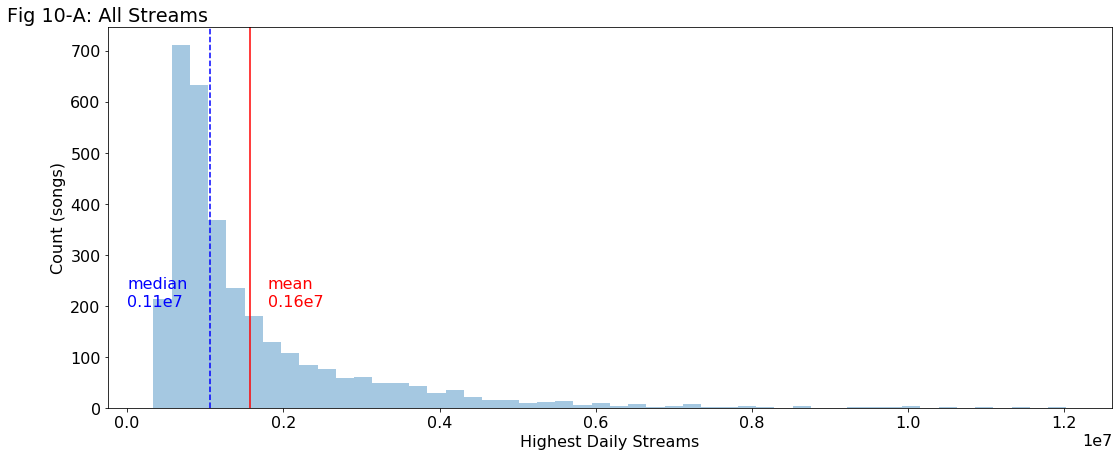

In [16]:
sns.distplot(df['streams'], kde=False, bins=50)
plt.title('Fig 10-A: All Streams', x=0)
plt.xlabel("Highest Daily Streams")
plt.ylabel("Count (songs)")
plt.axvline(df['streams'].describe()['mean'], color='r', linestyle='-', label='mean')
plt.axvline(df['streams'].describe()['50%'], color='b', linestyle='--', label='median')
plt.text(1800000, 200, 'mean\n' + "0.16e7", color='red')
plt.text(0, 200, 'median\n' + "0.11e7", color='blue')

We then graphed the distribution of streams grouped by artist popularity. We divided the artists into 3 categories:
- **one hit**: artists with 1 song in the top 200 (the first quartile)
- **moderate**: artists with 2 to 5 songs in the top 200 (interquartile)
- **popular**: artists with more than 6 songs in the top 200 (the fourth quartile)

The graph shows that the distributions of streams for artist in three categories are similar.

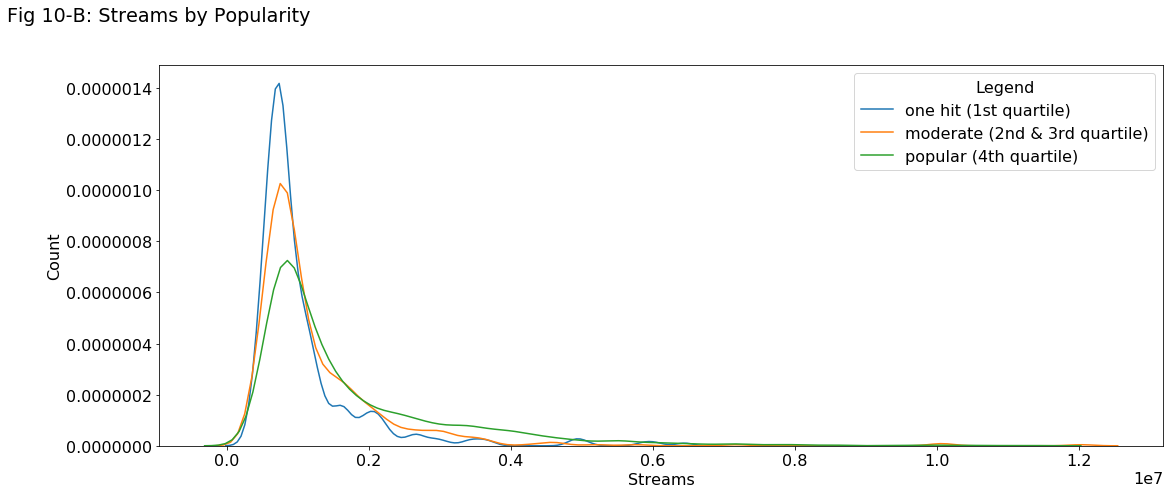

In [17]:
df_one_hit = df[df['artist_popularity'] == 'one hit']
df_moderate = df[df['artist_popularity'] == 'moderate']
df_popular = df[df['artist_popularity'] == 'popular']

ax = sns.distplot(df_one_hit['streams'], hist=False, bins=50, label='one hit (1st quartile)')
sns.distplot(df_moderate['streams'], hist=False, bins=50, label='moderate (2nd & 3rd quartile)')
sns.distplot(df_popular['streams'], hist=False, bins=50, label='popular (4th quartile)')

plt.ylabel('Count')
plt.xlabel('Streams')
plt.title(label="Fig 10-B: Streams by Popularity", x=0, y=1.1)
plt.legend(title='Legend', loc='upper right')

After looking at the distribution of streams, we decided to group the individual songs  based on their stream values. If a song was streamed more than 2 million times, it was "very popular", whereas 1 to 2 million total streams represented a song being "moderately popular", and anything below 1 million streams was "somewhat popular".

In [18]:
# after the observation, we decided that
# if a song has a stream number that is larger than 2,000,000, then it is very popular
# if the stream is between 1,000,000 to 2,000,000, it is moderate popular
# else it is somewhat popular
def determine_popularity(streams):
    if streams > 2000000:
        return 'very popular'
    elif streams > 1000000:
        return 'moderate popular'
    else:
        return 'somewhat popular'
df['song_popularity'] = df['streams'].apply(lambda x: determine_popularity(x))

#### Song Titles

- **Maximum length**: 21 words
- **Minimum length**: 1 word
- **Mean length**: 3.39 words
- **Median length**: 3 words
- **Interquartile Range**: 2 words to 4.75 words    

We can draw the distribution of the length of song titles.

Text(0, 0.5, 'Count (songs)')

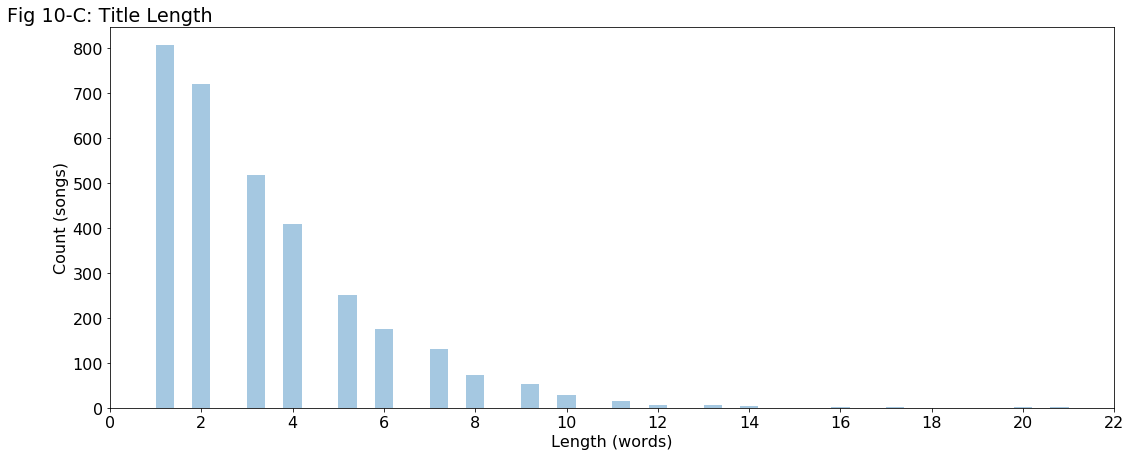

In [19]:
ax1 = sns.distplot(df['title_length'], kde=False)
plt.title(label='Fig 10-C: Title Length', x=0)

ax1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True, nbins=12))
ax1.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.xlabel('Length (words)')
plt.ylabel('Count (songs)')

We then calculate the average length of song titles grouped by song popularity.
Based on the results, there is not an apparent difference among these three categories.

In [20]:
very_popular_length = df.groupby('song_popularity').mean()['title_length']['very popular']
moderate_popular_length = df.groupby('song_popularity').mean()['title_length']['moderate popular']
somewhat_popular_length = df.groupby('song_popularity').mean()['title_length']['somewhat popular']
print("The average length for very popular song is: " + str(very_popular_length))
print("The average length for moderate popular song is: " + str(moderate_popular_length))
print("The average length for somewhat popular song is: " + str(somewhat_popular_length))

The average length for very popular song is: 3.105849582172702
The average length for moderate popular song is: 3.3383838383838382
The average length for somewhat popular song is: 3.3078470824949697


#### Lyrics
We encountered an initial error due to the international nature of many current popular songs. We decided to limit our analysis to words in the English language, so performed cleaning on the lyrics data set to remove non-English words for the purpose of analysis.

In [21]:
# we first make a set about all the stopwords
# since we only care about english songs, we will rmeove all the spanish words
spanish_words = open('eda_data/spanish.txt')
spanish = set([])
lines = spanish_words.readlines()
for line in lines:
    line = line.strip()
    spanish.add(line)
    
stop_words = set(stopwords.words('english'))
stop_words = set(list(stop_words) + list(set(stopwords.words('spanish'))))
# there will be some special stopwords for lyrics, like hoo-ya, we will also remove them
custom_stop_words = open('eda_data/lyrics_stop_words.txt')
lines = custom_stop_words.readlines()
for line in lines:
    line = line.strip()
    stop_words.add(line)
    
# finally, we delcare the stemmer
ps = PorterStemmer()
# declare the sentiment analyser
analyser = SentimentIntensityAnalyzer()

In [22]:
# data processing
# drop all non-english songs
drop_columns = []
for i, j in df.iterrows():
    try:
        if 'en' == detect(j['cleaned_lyrics']):
            continue
        else:
            drop_columns.append(i)
    except:
        drop_columns.append(i)
df = df.drop(drop_columns)
df['cleaned_lyrics'] = df['cleaned_lyrics'].apply(lambda x: x.lower()) # lower all the characters
df['cleaned_lyrics_tokenized'] = df['cleaned_lyrics'].apply(word_tokenize) # tokenize the word
df['cleaned_lyrics_tokenized'] = df['cleaned_lyrics_tokenized'].apply(lambda x: [item for item in x if item not in stop_words]) # remove stop words
df['cleaned_lyrics_tokenized'] = df['cleaned_lyrics_tokenized'].apply(lambda x: [item for item in x if item not in spanish and item not in ["``", "''", "\"", "'caus","'", 'ayi', "'em"]]) # remove spanish words
df['cleaned_lyrics_tokenized'] = df['cleaned_lyrics_tokenized'].apply(lambda x: [item for item in x if item not in string.punctuation]) # remove punc
df['cleaned_lyrics_tokenized'] = df['cleaned_lyrics_tokenized'].apply(lambda x: [ps.stem(y) for y in x]) # stem the word
cleaned_lyrics = df['cleaned_lyrics_tokenized'].apply(pd.Series).stack() # get series for all cleaned_lyrics
fdist_cleaned_lyrics = FreqDist(cleaned_lyrics) # calculation word frequency

In [23]:
df.to_csv('raw_data/cleaned_stemmed_tokenized.csv')

In [37]:
def draw_most_popular_words(df, title=None, draw=True):
    cleaned_lyrics = df['cleaned_lyrics_tokenized'].apply(pd.Series).stack()
    fdist_cleaned_lyrics = FreqDist(cleaned_lyrics) # calculation word frequency
    for punc in string.punctuation: # remove punctuation counts
        del fdist_cleaned_lyrics[punc]
    try:
        del fdist_cleaned_lyrics["'em"]
        del fdist_cleaned_lyrics["'caus"]
        del fdist_cleaned_lyrics["''"]
        del fdist_cleaned_lyrics["ayi"]
        del fdist_cleaned_lyrics["ta"]
        del fdist_cleaned_lyrics["i'ma"]
        del fdist_cleaned_lyrics["``"]
    except:
        pass
    
    # sort the frequency dictionary
    sort_fdist_cleaned_lyrics = sorted(fdist_cleaned_lyrics.items(), key=lambda x: x[1], reverse=True)

    # draw the top 20 words
    x = []
    y = []
    for t in sort_fdist_cleaned_lyrics[:10]:
        if draw == True:
            if t[0] == 'nigga':
                x.append('n*gga')
            elif t[0] == 'bitch':
                x.append('b*tch')
            elif t[0] == 'fuck':
                x.append('f*ck')
            elif t[0] == 'shit':
                x.append('sh*t')
            else:
                x.append(t[0])
        else:
            x.append(t[0])
        y.append(t[1])

    # Create bars and choose color
    if draw == True:
        plt.barh(x[::-1], y[::-1], color = (0.5,0.1,0.5,0.6))

        # Add title and axis names
        plt.ylabel('Word')
        plt.xlabel('Count')
        if title != None:
            plt.title(title, loc='left')
        else:
            plt.title('Fig 1-4: Top 10 Frequent Words', loc='left')
    
    return x

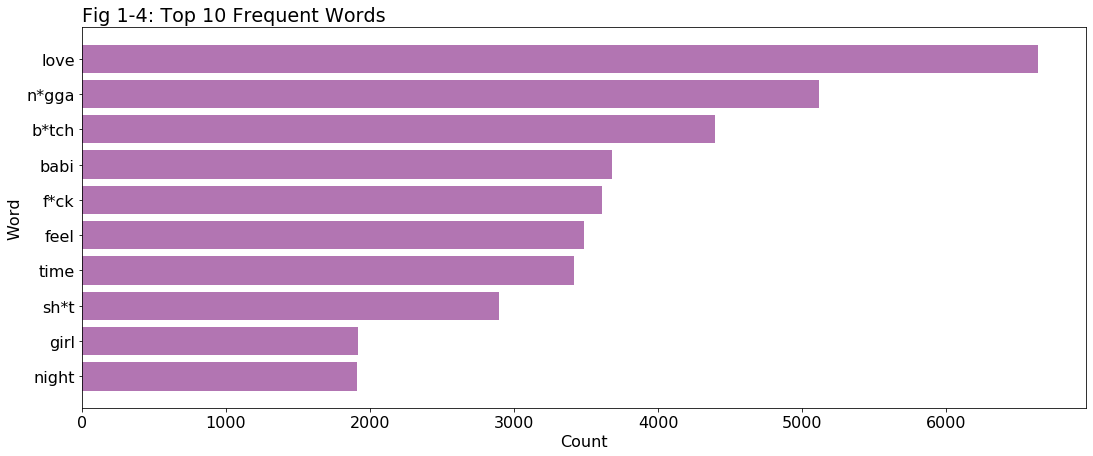

In [38]:
allsong_words = draw_most_popular_words(df)

According to Fig 1-4, 'love' is the word that is used the most in Spotify songs (what a surprise).


Also, more than half of the top 10 words are classfied as neutral. And only about 10 percent is classified as positive.

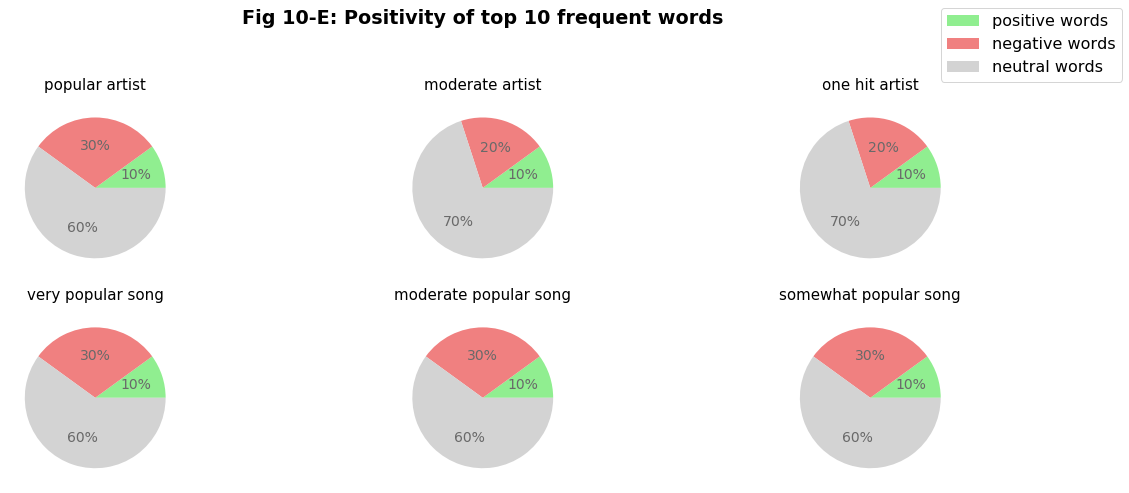

In [39]:
popular_artist_words = draw_most_popular_words(df[df['artist_popularity'] == 'popular'], draw=False)
moderate_artist_words= draw_most_popular_words(df[df['artist_popularity'] == 'moderate'], draw=False)
onehit_artist_words = draw_most_popular_words(df[df['artist_popularity'] == 'one hit'], draw=False)

very_popular_song_words = draw_most_popular_words(df[df['song_popularity'] == 'very popular'], draw=False)
moderate_song_words = draw_most_popular_words(df[df['song_popularity'] == 'moderate popular'], draw=False)
somewhat_popular_song_words = draw_most_popular_words(df[df['song_popularity'] == 'somewhat popular'], draw=False)

fig, axs = plt.subplots(2, 3)
fig.suptitle('Fig 10-E: Positivity of top 10 frequent words', fontweight='bold')

artist_popularity = [popular_artist_words, moderate_artist_words, onehit_artist_words]
song_popularity = [very_popular_song_words, moderate_song_words, somewhat_popular_song_words]
popularity = [artist_popularity, song_popularity]
title = [['popular artist', 'moderate artist', 'one hit artist'], 
         ['very popular song', 'moderate popular song', 'somewhat popular song']]

for i in range(0,2):
    for j in range(0, 3):
        words = popularity[i][j]
        pos = 0
        neg = 0
        neu = 0
        for word in words:
            score = analyser.polarity_scores(word)
            if score['neg'] == 1.0:
                neg += 1
            elif score['pos'] == 1.0:
                pos += 1
            else:
                neu += 1
        colors = ['lightgreen', 'lightcoral', 'lightgrey']
        axs[i, j].pie([pos, neg, neu], autopct=(lambda x: f'{int(round(x))}%'  if x > 0 else None) , colors=colors, textprops={'fontsize': 14, 'color':'dimgrey'});
        axs[i, j].set_title(title[i][j], pad=10, fontsize=15)
# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig.legend(labels=['positive words', 'negative words', 'neutral words'])
fig.tight_layout()
fig.subplots_adjust(top=0.8)

#### Lyric Length

We identified the average length of a song by song popularity. The results shows that the very popular song is on average shorter than the average moderately popular song and the average somewhat popular song.

In [27]:
very_popular_length = df.groupby('song_popularity').mean()['song_length']['very popular']
moderate_popular_length = df.groupby('song_popularity').mean()['song_length']['moderate popular']
somewhat_popular_length = df.groupby('song_popularity').mean()['song_length']['somewhat popular']
print(f'Average Lengths:\nPopular: {very_popular_length:.2f} words\nModerate: {moderate_popular_length:.2f} words\nSomewhat: {somewhat_popular_length:.2f} words.')

Average Lengths:
Popular: 434.79 words
Moderate: 454.00 words
Somewhat: 452.32 words.


We also calculated the average length by artist popularity. The result show that popular artists tend to write longer songs.

In [28]:
very_popular_length = df.groupby('artist_popularity').mean()['song_length']['popular']
moderate_popular_length = df.groupby('artist_popularity').mean()['song_length']['moderate']
somewhat_popular_length = df.groupby('artist_popularity').mean()['song_length']['one hit']
print(f"The average song length from popular artists is: {very_popular_length:.2f} words")
print(f"The average song length from moderate artists is: {moderate_popular_length:.2f} words")
print(f"The average song length from one hit artists is: {somewhat_popular_length:.2f} words")

The average song length from popular artists is: 464.78 words
The average song length from moderate artists is: 399.96 words
The average song length from one hit artists is: 390.38 words


# 11 - TF-IDF

In [29]:
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=500,
                        tokenizer=word_tokenize,
                        stop_words=stop_words)
corpus = []
for i, j in df.iterrows():
    corpus += j['cleaned_lyrics_tokenized']


In [30]:
tfidf_X = tfidf.fit_transform(corpus).toarray()

In [31]:
allsong_words[1] = 'nigga'
allsong_words[2] = 'bitch'
allsong_words[4] = 'fuck'
allsong_words[7] = 'shit'
IDF_weights = [tfidf.idf_[tfidf.vocabulary_[token]] for token in allsong_words]
allsong_words[1] = 'n*gga'
allsong_words[2] = 'b*tch'
allsong_words[4] = 'f*ck'
allsong_words[7] = 'sh*t'

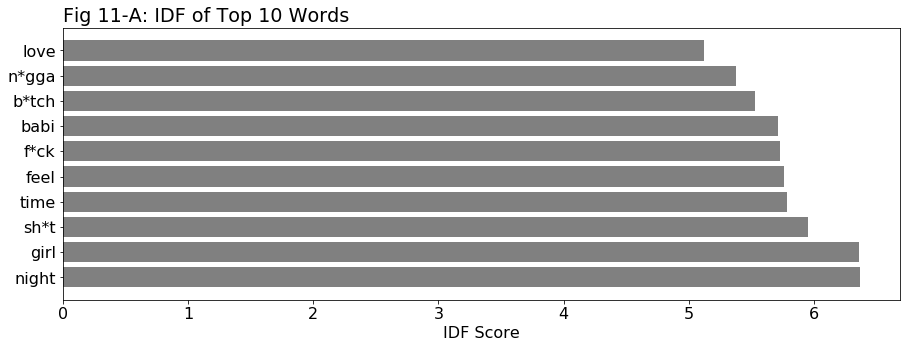

In [36]:
# Plot the IDF scores for the very common words
plt.barh(allsong_words[::-1], IDF_weights[::-1], color='grey')
plt.xlabel('IDF Score');        
plt.title("Fig 11-A: IDF of Top 10 Words", loc='left')
fig = plt.gcf()
# fig.set_size_inches(10,4);
fig.set_size_inches(15,5);

We compare the plot with the following plot that shows the words with top 10 highest IDF.

In [33]:
# Get the words with the highest IDF score
inds = np.argsort(tfidf.idf_)[::-1][:10]
top_IDF_tokens = [list(tfidf.vocabulary_)[ind] for ind in inds]
top_IDF_scores = tfidf.idf_[inds]

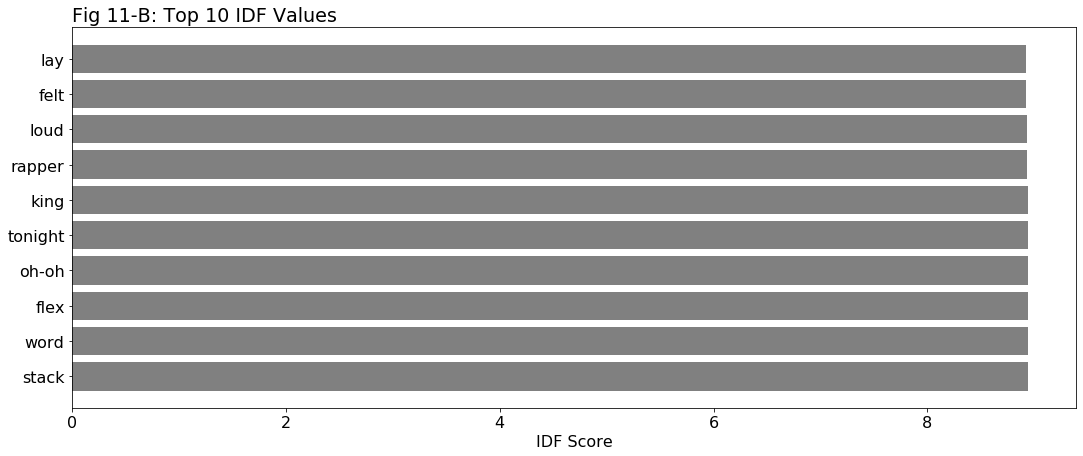

In [34]:
# Get the words with the highest IDF score
plt.barh(top_IDF_tokens, top_IDF_scores, color='grey')
plt.title('Fig 11-B: Top 10 IDF Values', loc='left');
plt.xlabel('IDF Score');

# 12 - Sentiment analysis


### 12-1: Load data

To start the sentiment analysis for lyrics of popular songs in spotify, we will first load the data and check if the data file is ready to use.

In [78]:
#import the data for popular song data
df_lyrics=pd.read_csv('raw_data/merged_and_cleaned_lyrics.csv', index_col=0)
#drop some useless indexing column caused by importing file
#df_lyrics.drop(df_lyrics.iloc[:,0:3], inplace=True, axis=1)

In [57]:
#check if there's any null value
df_lyrics.isnull().sum()

track_name           0
artist               0
album                0
lyrics               0
cleaned_lyrics       0
song_length          0
title_length         0
streams              0
artist_popularity    0
dtype: int64

In [79]:
df_lyrics['cleaned_token']=df_lyrics['cleaned_lyrics'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
df_lyrics['cleaned_without_stop']=df_lyrics['cleaned_token'].apply(lambda a:[word for word in a if word not in stop_words ])
df_lyrics['cleaned_stem']=df_lyrics['cleaned_without_stop'].apply(lambda a:[ps.stem(b) for b in a])

## Sentiment Analysis

We chose a lexicon-based method that divides each word in a song into one of three possible sentiments ( negative, neutral and positive). We then calculated a compound sentiment score for each song. We chose to use the VADER lexicon. because it contains appropriate values for sentiment analysis of song lyrics. We do run into potential issues involving foreign words, so as a precaution we limited our data set to only songs containing English words exclusively.

In [80]:
#analysis the overall sentiment in each songs based on their lyrics in a lexicon-based method
#Get the overall sentiments by comparing lyrics with VADER lexicon
analyser = SentimentIntensityAnalyzer()
#using the lyrics in "cleaned_lyrics" column for comparison.
lyrics_list= list(df_lyrics['cleaned_lyrics'].values)
#define a function that would return a dataframe that contains overall compound sentiment scores of each song in our dataset
def sentiment_info(input_list):
    output=pd.DataFrame()
    for lyrics in input_list:
        sentiment = analyser.polarity_scores(lyrics)
        sentiment['lyrics']=lyrics
        output=output.append(sentiment,ignore_index=True)
    return output
#apply the function to the list that contains our cleaned lyrics
lyrics_sentiment=sentiment_info(lyrics_list)
lyrics_sentiment.index.name = 'index'
lyrics_sentiment.head(1)

,compound,lyrics,neg,neu,pos
index,,,,,
0,-0.9893,I'm tryna put you in the worst mood ah P1 cleaner than your church shoes ah Milli point two just to hurt you ah All red Lamb just to tease you ah None of these toys on lease too ah Made your whole year in a week too yah Main bitch out your league too ah Side bitch out of your league too ah House so empty need a centerpiece 20 racks a table cut from ebony Cut that ivory into skinny pieces Then she clean it with her face man I love my baby You talking money need a hearing aid You talking bout me I don't see the shade Switch up my style I take any lane I switch up my cup I kill any pain Look what you've done Im a motherfuckin' starboy Look what you've done I'm a motherfuckin' starboy Every day a nigga try to test me ah Every day a nigga try to end me ah Pull off in that Roadster SV ah Pockets overweight gettin' hefty ah Coming for the king that's a far cry ah I come alive in the fall time I No competition I don't really listen Im in the blue Mulsanne bumping New Edition House so empty need a centerpiece 20 racks a table cut from ebony Cut that ivory into skinny pieces Then she clean it with her face man I love my baby You talking money need a hearing aid You talking bout me I dont see the shade Switch up my style I take any lane I switch up my cup I kill any pain Look what you've done Im a motherfuckin' starboy Look what you've done I'm a motherfuckin starboy Let a nigga brag Pitt Legend of the fall took the year like a bandit Bought mama a crib and a brand new wagon Now she hit the grocery shop looking lavish Star Trek roof in that Wraith of Khan Girls get loose when they hear this song 100 on the dash get me close to God We don't pray for love we just pray for cars House so empty need a centerpiece 20 racks a table cut from ebony Cut that ivory into skinny pieces Then she clean it with her face man I love my baby You talking money need a hearing aid You talking 'bout me I don't see the shade Switch up my style I take any lane I switch up my cup I kill any pain Look what you've done I'm a motherfuckin' starboy Look what you've done I'm a motherfuckin' starboy Look what you've done I'm a motherfuckin' starboy Look what you've done I'm a motherfuckin' starboy,0.158,0.772,0.071


After get the dataframe that containes each song's overall compound sentiment score, we can first draw a distribution pattern of these songs' lyrics sentiment to get some intuition.

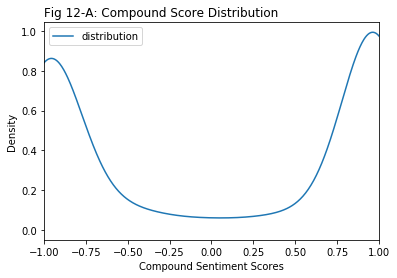

In [60]:
#check the compound score distribution of lyrics' sentiment
lyrics_sentiment['compound'].plot.density(label='distribution')
plt.legend()
plt.xlabel('Compound Sentiment Scores')
plt.title(label='Fig 12-A: Compound Score Distribution', loc='left')
plt.xlim(-1,1);

From the distribution pattern it's clear that popular songs' lyrics sentiment distribution tend to be a bipolar model, where the compound sentiment scores mainly concentrate on the two ends of the distribution range (indicating a strong lack of neutral songs).

After obtaining the compound sentiment score for each song's lyrics, we will update our dataframe to merge these sentiment informations into our original dataset and sort songs by popularity.

In [62]:
#generate a new dataframe that contains each song's lyrics and compound sentiment score
total_lyrics_df=pd.concat([df_lyrics, lyrics_sentiment],axis=1, join='inner')
#total_lyrics_df.set_index('index', inplace=True)

In [81]:
#drop some columns that contains only few informaiton in the final dataset in order to have a better insight.
cleaned_total_lyrics=total_lyrics_df.drop(columns=['lyrics','neg','neu','pos','lyrics'])
#sort the dataframe based on songs' streaming numbers from highest to lowest.
#cleaned_total_lyrics=cleaned_total_lyrics.sort_values(by='streams', ascending=False)

#cleaned_total_lyrics.head(10)
#cleaned_total_lyrics[cleaned_total_lyrics['artist'] == "Mariah Carey"]

## 12-2: Categorize Sentiment Using Compound Score

We decided to categorize songs with a compound sentiment score larger that 0.05 as generally positive, those with a compound sentiment score less that -0.05 as generally negative ones, and those in between -0.05 and 0.05 as generally neutral.

In [82]:
#define a function that counts every song that compound sentiment score is larger than 0.05
def positive_sentiment(score):
    if score > 0.05:
        return 1
    else:
        return 0
#these songs are determined to be overall positive ones and stored in a new column named "positive"
cleaned_total_lyrics['positive']=cleaned_total_lyrics['compound'].apply(positive_sentiment)
#define a function that counts every song that compound sentiment score is less than -0.05
def negative_sentiment(score):
    if score <-0.05:
        return 1
    else:
        return 0
#these songs are determined to be overall negative ones and stored in another new column named "negative"
cleaned_total_lyrics['negative']=cleaned_total_lyrics['compound'].apply(negative_sentiment)
#define a function that counts every song that compound sentiment score is between -0.05 and 0.05
def neutral_sentiment(score):
    if -0.05<=score<=0.05:
        return 1
    else:
        return 0
#these songs are determined to be overall neutral ones and stored in another new column named "neutral"
cleaned_total_lyrics['neutral']=cleaned_total_lyrics['compound'].apply(neutral_sentiment)
#cleaned_total_lyrics.head(1)
    

In [65]:
#store this dataframe as a csv file.
cleaned_total_lyrics.to_csv('raw_data/cleaned_lyrics_sentiment.csv')

# 13 - Data Analysis
* In this part of the project, we will test our null hypothesis -- the sentiment of lyrics has no effect on popularity of a English-language song on Spotify from 2017 to 2019. 
* In particular, we performed OLS linear regression of the sentiment of a song on its popularity. 
* The reason for choosing this method is that OLS linear regression is a good way to analyse correlation between variables by finding the best fitting line that minimize the sum of squared residuals. Also, it can take both catagorical and numeric features into the analysis smoothly. Lastly, the result of a linear regression is somewhat easy to interpret, comparing to more sophisticated methods such as polynomial regression. 
* The baseline feature we use for the regression is the sentiment of a song. It is represented by its sentimental compound score that we calculated above using the VADER lexicon. Then, we generated dummy variables called "positive", "negative" and "neutral" that reflects the song's sentiment based on that score. 
* The dependent variable we use for the regression is the popularity of a song. It is represented by the number of streams a song has. We adjusted its unit for human reable purpose.
* We also included the length of a song, the length of its lyrics, and the popularity of its artist(s) as control variables to avoid potential bias in the regression. 
* From the regression result, we look at the p-value and the t-score to see whether the feature is statistically significant or not. We will consider the feature to be significant at 95% confidence interval (i.e. p <= 0.05 or |t| >= 1.96). Also, we will look at the R-squared and the adjusted R-squared to see how much the model explains the relationship between the features of a song and its popularity.



## 13-1. Preprocessing for OLS Regression Analysis


### Data processing:
* Drop irrelevant columns
* Dummy coding for artist popularity
* Adjust base units for "stream" from 'one' to 'million'.

In [66]:
# import dataset and drop irrelavant columns
df = pd.read_csv('raw_data/cleaned_lyrics_sentiment.csv', index_col="index") 
df = df[['streams','positive','negative','song_length','title_length','artist_popularity','compound']].copy()
df
# rescale streams column in millions 
df['streams'] = np.around(df["streams"]/1000000, 3)

In [67]:
pop_dummy = pd.get_dummies(df['artist_popularity'])
pop_dummy = pop_dummy[['popular', 'moderate', 'one hit']]
pop_dummy = pop_dummy.rename(columns = {'one hit': 'one_hit'})

df = pd.concat([df, pop_dummy], axis = 1)
df.sort_values(by=['streams'], ascending=False, inplace=True)
df.head()

,streams,positive,negative,song_length,title_length,artist_popularity,compound,popular,moderate,one_hit
index,,,,,,,,,,
2085,12.029,1,0,399,7,moderate,0.9230,0,1,0
1165,11.382,1,0,530,4,popular,0.9664,1,0,0
782,10.977,1,0,541,6,popular,0.9915,1,0,0
272,10.446,1,0,499,2,popular,0.9973,1,0,0
1328,10.415,0,1,290,1,popular,-0.9953,1,0,0


## Data Visualization 
* We use scatterplot to show the relationship between sentiment scores and streams of all songs in the dataframe.

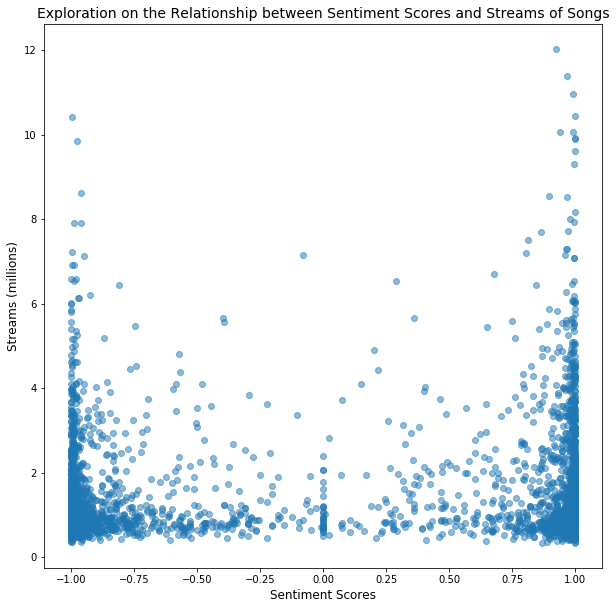

In [68]:
fig, axes = plt.subplots(1, figsize = [10,10])

## scatterplot 
plt.scatter(x = 'compound', y = 'streams', alpha = 0.5, data = df)

axes.set_xlabel('Sentiment Scores', fontsize = 12)
axes.set_ylabel('Streams (millions)', fontsize = 12)
axes.set_title('Exploration on the Relationship between Sentiment Scores and Streams of Songs', 
               fontsize = 14)

plt.show()

Discussion: From the graph above, we can see a somewhat bimodal distribution of streams based on sentiment scores. In particular, most of songs tend to have extreme sentiment scores that are very positive or negative. There are also are songs that tend to be neutral in their sentiment. 

## Data Analysis & Results

* In this part, we performs OLS regression of the sentiment of a song on its popularity. Our baseline model is by regressing "positive" and "negative" on "streams". Then, we include control variables one at a time. First, we look at its p-value and t-score to conclude its statstical signifance. Then, we look at the new adjusted R-squared to see whether it improves our model or not.

* In particular, we use "positive", "negative" and "neutral" as dummy varibles to represent compound sentiment scores of a song. Since these three variables sums to 1, to include all of them will result in perfect multicollinearity. Therefore, we choose to include only "positive" and "negative" in the regression. It is the same case for "artist popularity" as well. The ols method will automatically drop one variable for us.

### Model 1 -- Baseline Model:
streams = β0 + β1·positive + β2·negative


In [69]:
model_1 = ols("streams ~ positive + negative",data= df).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     23.54
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           7.12e-11
Time:                        21:53:27   Log-Likelihood:                -5458.1
No. Observations:                3199   AIC:                         1.092e+04
Df Residuals:                    3196   BIC:                         1.094e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0773      0.225      4.780      0.0

Discussion: 
* *positive* is statistically significant at 95% confidence interval to explain the variation in *streams*. 
* *negative* is not statistically significant at 95% confidence interval to explain the variation in *streams*.
* The coefficient of *positive* tells us that songs with positive sentiment have about 0.64 millions more streams than neutral songs, on average. The coefficient of *negative* tells us that songs with negative sentiment have about 0.33 millions more streams than neutral songs on average. Also, positive songs have 0.31 millions more streams than that of negative songs. 
* The R-squared of this model is relatively small. It means that the features of this baseline model, *positive* and *negative*, can only explain about 1.5% of the variations in streams of song. 

### Model 2 -- Baseline Model with *song_length* as Control Variable:
streams = β0 + β1·positive + β2·negative + β3·song_length

In [70]:
model_2 = ols("streams ~ positive + negative + song_length",data= df).fit()
print(model_2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     15.82
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           3.29e-10
Time:                        21:53:30   Log-Likelihood:                -5457.9
No. Observations:                3199   AIC:                         1.092e+04
Df Residuals:                    3195   BIC:                         1.095e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0596      0.227      4.664      

Discussion: 
* Based on the p-value and t-score, *song_length* is not statistically significant at 95% confidence interval to explain the variation in *streams*. Since it is not significant, we can see that both the R-sqaured and adjusted R-sqaured did not increase.
* Its coefficient suggests that as the length of the lyrics increase by one word, the number of streams it gets will only increase by about 7.5, holding other variables constant. This increment of streams is can be negligible when considering the scale in which streams are often measured in.

### Model 3 -- Baseline Model with *song_length* and *title_length* as Control Variable:
streams = β0 + β1·positive + β2·negative + β3·song_length + β4·title_length

In [71]:
model_3 = ols("streams ~ positive + negative + song_length + title_length"
,data= df).fit()
print(model_3.summary()) 

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     12.76
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           2.63e-10
Time:                        21:53:33   Log-Likelihood:                -5456.1
No. Observations:                3199   AIC:                         1.092e+04
Df Residuals:                    3194   BIC:                         1.095e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1125      0.229      4.862   

Discussion: 
* Based on the p-value and t-score, *title_length* is also not statistically significant at 95% confidence interval to explain the variation in *streams*. It is, however, statistically significant at 94.1% confidence interval.
* Its coefficient suggests that as the length of the song title increase by one word, the number of streams it gets will only decrease by about 19,100, holding other variables constant. This is an increasing finding since the number of words in your song title can actually negatively impact the streams of the song. Before listening to a song, the listener can be attracted by the song title at first. Therefore, a song with a attractive short name may increase the streams of the song.
* We can also observe the the adjusted R-squared increased by 0.1%.

### Model 4 -- Baseline Model with *song_length*, *title_length*, *popular* and *moderate* as Control Variable:
streams = β0 + β1·one_hit + β2·popular + β3·positive + β4·negative + β5·song_length + β6·title_length

In [72]:
model_4 = ols("streams ~ positive + negative + song_length + title_length + artist_popularity",data= df).fit()
print(model_4.summary()) 

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     25.06
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           3.35e-29
Time:                        21:53:36   Log-Likelihood:                -5407.8
No. Observations:                3199   AIC:                         1.083e+04
Df Residuals:                    3192   BIC:                         1.087e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Discussion: 
* Based on the p-value and t-score, *popular* is statistically significant at 95% confidence interval to explain the variation in *streams*. *one_hit* is, however, statistically significant at 92.9% confidence interval.
* *popular*'s coefficient suggests that being a popular singer, meaning you already have at least 20 songs on the top 200 songs on spotify, your streams will be 452,100 more than other artists. It is no surprise that *popular* and *streams* are strongly positively correlated since we calculate popularity of artists based on the number of songs they have on the top 200 spotify chart. 
* For *one_hit*, despite its insignificant t-score, it shows that a artists who have only one song on the top 200 spotify chart will have 167,800 fewer streams than other artists.
* We can observe that the adjusted R-squared increased by 2.9%, meaning that we model is improving as it tries to explain the dependent variable, *streams*.

### Model 5 -- Final Model with *positive* and *popular* as features:
* Based on the discussion above, we finalize our OLS model with features are are only statistically significant at 95% confidence interval to explain the variation in streams. 

streams = β0 + β1·positive + β2·popular 

In [73]:
model_f = ols("streams ~ positive + popular",data= df).fit()
print(model_f.summary()) 

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     71.91
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           2.84e-31
Time:                        21:53:40   Log-Likelihood:                -5411.0
No. Observations:                3199   AIC:                         1.083e+04
Df Residuals:                    3196   BIC:                         1.085e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0290      0.051     20.210      0.0

Discussion: 
* Based on the p-value and t-score, both *popular* and *positive* are statistically significant at 95% confidence interval to explain the variation in *streams*.
* They are both strongly positively correlated with *streams*.
* We can observe that the adjusted R-squared only decreased by 0.1% after we dropped the insignificant features from our regression. 

### Model 6 -- Final Model with *compound* and *popular* as features:
* To better deliver our findings, we added a visualization of the best fitting line to explain our model. In order to draw a reader friendly plot, we used *compound*, which measures the compound sentiment score of each song, to regress on *streams*. It is because *positive* is a dummy variable so it is not ideal for visualizing linear regression. Dummy variables only take values of 0 and 1, so fitting a line between such values are not ideal to illustrate the relationship between features and dependent variable. Rather, a best-fitting line with a continuous variable and dependent variable can explain the data much more effectively.
* Therefore, we perform OLS regression with *compound* and *popular* on *stream* and craeted a best fitting line with the result. 


streams = β0 + β1·compound + β2·popular 

In [74]:
model_f2 = ols("streams ~ compound + popular",data= df).fit()
print(model_f2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     71.08
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           6.30e-31
Time:                        21:53:43   Log-Likelihood:                -5411.8
No. Observations:                3199   AIC:                         1.083e+04
Df Residuals:                    3196   BIC:                         1.085e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1797      0.045     26.281      0.0

Discussion: 
* Based on the p-value and t-score, both *popular* and *compound* are statistically significant at 95% confidence interval to explain the variation in *streams*.
* They are both strongly positively correlated with *streams*.
* We can observe that the adjusted R-squared did not change at all after we replaced *positive* with *compound*. It is because *positive* is a product from compound score.
* From the coeffients, we can conclude that as the compound score of a song from a popular artist increase by 0.01, the streams of that song will increase by 693,700. On the other hand, as the compound score of a song from a artist who is not popular increase by 0.01, the streams of that song will increase by 170,200.

### Visualization: 
* The best fitting line plot.
* The best fittingline plot grouped by artist popularity.

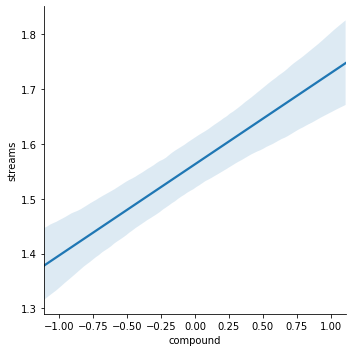

In [75]:
# best fitting line with compound on streams.
sns.lmplot('compound', 'streams', scatter = False, data = df)
plt.show()

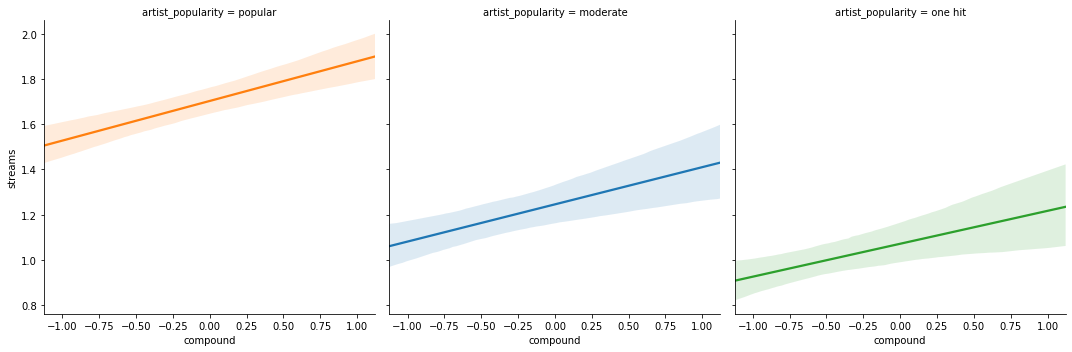

In [76]:
sns.lmplot('compound', 'streams', col= "artist_popularity",
           hue = "artist_popularity", 
           col_order = ['popular', 'moderate', 'one hit'], 
           scatter = False, data = df)
plt.show()

Discussion:

In order to better understand the dataset, we have also drawn the best fitting lines based on artist popularity. 
* The best fitting lines above shows the relationship between *compound* and *streams* based on artrist popularity. We can see a positive relationship between the two variables. Also, the number of streams decrease progressively as popularity of a singer decreases.
* The slope of the best fitting lines becomes flatter as the popularity of artists decreases. This is because the coefficient of *popular* is greater than those of *moderate* and *one_hit*, as shown in *model 4* above. 
* The shaded areas shows the confidence interval of the best fitting line. It tends to be wider on both ends where most songs are concentrated at. This means there are more variation on both ends, especially on the positive end.
* We can also see the confidence interval for *popular* is more consistent that those for *moderate* and *one_hit*. It is because, as shown in the regression models above, *moderate* and *one_hit* are both statistically insignificant to explain the variation of streams.

#### Conclusion:
Based on the discussion above, we can reject our null hypothesis and conclude that the sentiment scores of lyrics do affect the popularity of a song. Both the sentiment score and the popularity of singer(s) are statistically significant to explain the variation in streams of a English song on spotify from 2017 to 2019. They are both positively correlated with streams. In particular, a song with positive lyrics will have more streams comparing to songs with neutral or negative lyrics. On other other hand, the length of a song's title and lyrics are not strongly related to the number of streams Therefore, our findings suggests that if a song is positive and its artist is popular, it is likely to be popular. However, the R-squared score of our model is relatively low. Therefore, more features should be included in the regression process. In the future, we would like to include more regressors such as artists’ gender and music genres to include our R^2. This will be very crucial if we would like to build a predictive model from our analysis.

# Ethics & Privacy

The Spotify charts are publically available online for sharing, so there will not be any confidentiality issue regarding pulling, cleaning and analyzing the public data. Specifically, our main data source, the Spotify Charts, is created by the firm’s data analysis team serving for public sharing and demonstration. Our reference source is from Psychology Today and The Royal Society, and findings and arguments in the article and research paper are only used as a comparison with the result we will formulate from Spotify Charts. Our analysis will not hinder any particular Spotify user’s privacy since we do not have access to any specific individual's song choices. However, our study  might hinder the company’s business since we will conduct a study on the firm’s consumer choices. If we make our result public, Spotify’s competitors may gain additional knowledge on how to win customers from Spotify. However, since Spotify decided to publish its users’ data, the company should have already predicted the potential threats to its company. 

There is potential bias in our population of study since younger generations have a larger tendency to use Spotify, so our study does not fully represent all music listeners. We have limited ways to handle this bias, but since Spotify is the mainstream music listening source and has a dominant customer base over its competitors, we would consider this the best data for study that we can get within 10 weeks of time. However, we will acknowledge this bias again in our limitation analysis. Also, our result may potentially impact songwriters in their future works since they might think that following the trends our study discovers may popularize their songs. As a result, the songs these writers compose may not truly express their own thoughts and feelings, therefore losing the essence of songwriting. Again, we can barely help with this. Nonetheless, we recognize that numerous songwriting analyses have been done previously, and our study would only serve as an additional source that songwriters or listeners could reference. Again, this will be explained in the ethics and privacy segment of our final project. 

# Conclusion & Discussion

Despite the significance of the coefficients, the R-squared of our final model is relatively small. This is because we failed to account other features that could affect streams of a song. These features may include, for example, the gender and race of the artist(s), the peroid in which the song released and etc. Since these features are important factors that can affect the number of people listening a particular song, our model is not sufficient enough to explain the variation in streams. Due to the limitation of time and access to such data, we cannot include more features in our model.

Also, the way we quantify artist popularity can be somewhat bias. This is because we grouped artist popularity based on the number of songs they have uniquely on the Spofity chart. It can be biased since we are basicly using user preference on Spofity to analyse Spofity data. A better way to to this is to use data from other platform to quantify artist popularity. We orginally wanted to use the number of followers each artist or band has on twitter, but we failed since it is not practical without requiring data directly from twitter.

Therefore, the way to improve this model is to include more features into the regression. This way, the R-squared / adjuested R-sqaured could increase and the model will be able to capture more of the variation of streams.

We would like to thank Prof. Ellis and Teaching Assistant Matt for their advice and support throughout the project, especially during this difficult time. Our group learned a lot from this project. We successfully carried out analysis using the methods taught in lecture videos and did our own research to explore as well. We now have a better understanding of linear regression and sentiment analysis. During the process, we facilitated effective communication, performed collaborative teamwork and everyone had fun with the project.

# Team Contributions

Daniel Shaughnessy:
* web scraper
* assisted with lyric scraper
* data parsing
* data cleaning
* video editing
* editing and formatting

Duolan Ouyang:
* lyric scraping
* EDA
* TF-IDF

Jingyi Ye: 
* Came up with the analysis plan together with Ruiwei
* Worked on the data analysis part of the research with Ruiwei — OLS linear regression and conclusion. 
* Contributed to the presentation making.

Jialin Wang:
* sentiment analysis

Ruiwei Zhou:
* Linear regression section - further researched linear regression methods and carried out OLS summary analysis
* analysis visualizations 
* Final researach proposal revision and editing 
* Communication with Prof. Ellis and TA
